# Проект

Я выбрал задачу классификации сахарного диабета, потому что мне стало интересно узнать насколько эффективными и высокоточными могут быть алгоритмы машинного обучения в задачах медицинской диагностики, а также потому что задача классификации нравится мне больше задачи регрессси (считаю её более трудной). Более того, мне интересно научиться тому, как повысить точность и эффективность предсказаний алогритма, ведь это очень важно в медицинской сфере (каждая ошибка может стоить жизни!), и более глубоко разобраться в алгоритмах классификации, которые рассматривались на семинарских занятиях.

Задача определения именно сахарного диабета, а не какого-либо иного заболевания была выбрана в связи с достаточным количеством элементов в датасете, в отличие от наборов даннных по классификации иных заболеваний. Тем не менее, данные в используемом датасете не лучшего качества и требуют обработки.

Ссылка на набор данных: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

### Немного о наборе данных

Полное описание набора данных: https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names

Датасет содержит информацию о клинических показаниях 768 пациентов женского пола.

Количество объектов: 768

Количество признаков: 9 (вместе с целевым признаком)

Признаки:<ul>
<li><i>Number of times pregnant</i> - количество беременностей;</li>
<li><i>Plasma glucose concentration</i> - плазменные концентрации глюкозы в 2-часовом тесте на толерантность к глюкозе;</li>
<li><i>Blood pressure</i> - диастолическое артериальное давление (мм рт.ст.);</li>
<li><i>Triceps skin fold thickness</i> - толщина кожно-жировой складки над трицепсом(мм) (используется для оценки жира в организме)</li>
<li><i>Serum insulin</i> - концентрация инсулина в сыворотке</li>
<li><i>Body mass index</i> - индекс массы тела (вес в кг / (рост в м)^2)</li>
<li><i>Diabetes pedigree function</i> - оценка гинеологического анамнеза на предрасположенность к диабету (оценка развития диабета из-за наследственности)</li>
<li><i>Age</i> - возраст в годах</li>
<li><i>Diabetes</i> - Признаки наличия диабета (0-нет, 1-есть)</li>
</ul>

Количество объектов в классе 0: 500

Количество объектов в классе 1: 268

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as ses

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [3]:
df = pd.read_csv("pima diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration,Blood pressure,Triceps skin fold thickness,Serum insulin,Body mass index,Diabetes pedigree function,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Видно, что часть значений в столбцах не является логичной (к примеру, давление не может быть равным нулю).
Поэтому, было решено заменить нулевые значения на средние по столбцу.

In [4]:
for column in df.columns[1:6]:
    df.ix[df[column]==0, column] = df[column].mean()
df[df.columns[:-1]].describe().T

,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Plasma glucose concentration,768,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
Blood pressure,768,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
Triceps skin fold thickness,768,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Serum insulin,768,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
Body mass index,768,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
Diabetes pedigree function,768,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00


Нелогичные значения исчезли, однако заметно, что масштаб признаков неодинаков, следовательно, необходимо в дальнейшем провести их стандартизацию.

Посмотрим на корреляцию признаков.

In [5]:
df.corr()

,Number of times pregnant,Plasma glucose concentration,Blood pressure,Triceps skin fold thickness,Serum insulin,Body mass index,Diabetes pedigree function,Age,Diabetes
Number of times pregnant,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Plasma glucose concentration,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
Blood pressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
Triceps skin fold thickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Serum insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
Body mass index,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
Diabetes pedigree function,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Diabetes,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


В выборке есть признаки, коррелирующие с целевым, а значит, задачу можно решать линейными методами.
Из таблицы можно заметить, что наибольшую зависимость с целевым признаком имеют признаки Plasma glucose concentration и Body mass index.
Вероятно, они будут оказывать наибольшее влияние на значение целевого признака.

Также стоить заметить, что среди вещественных признаков также есть те, которые довольно сильно коррелируют (к примеру, Body mass index и Triceps skin fold thickness). Это может негативно сказаться на обучении будущей модели.

### Гистограммы всех признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EF2AC5D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000019EF2E00CF8>]], dtype=object)

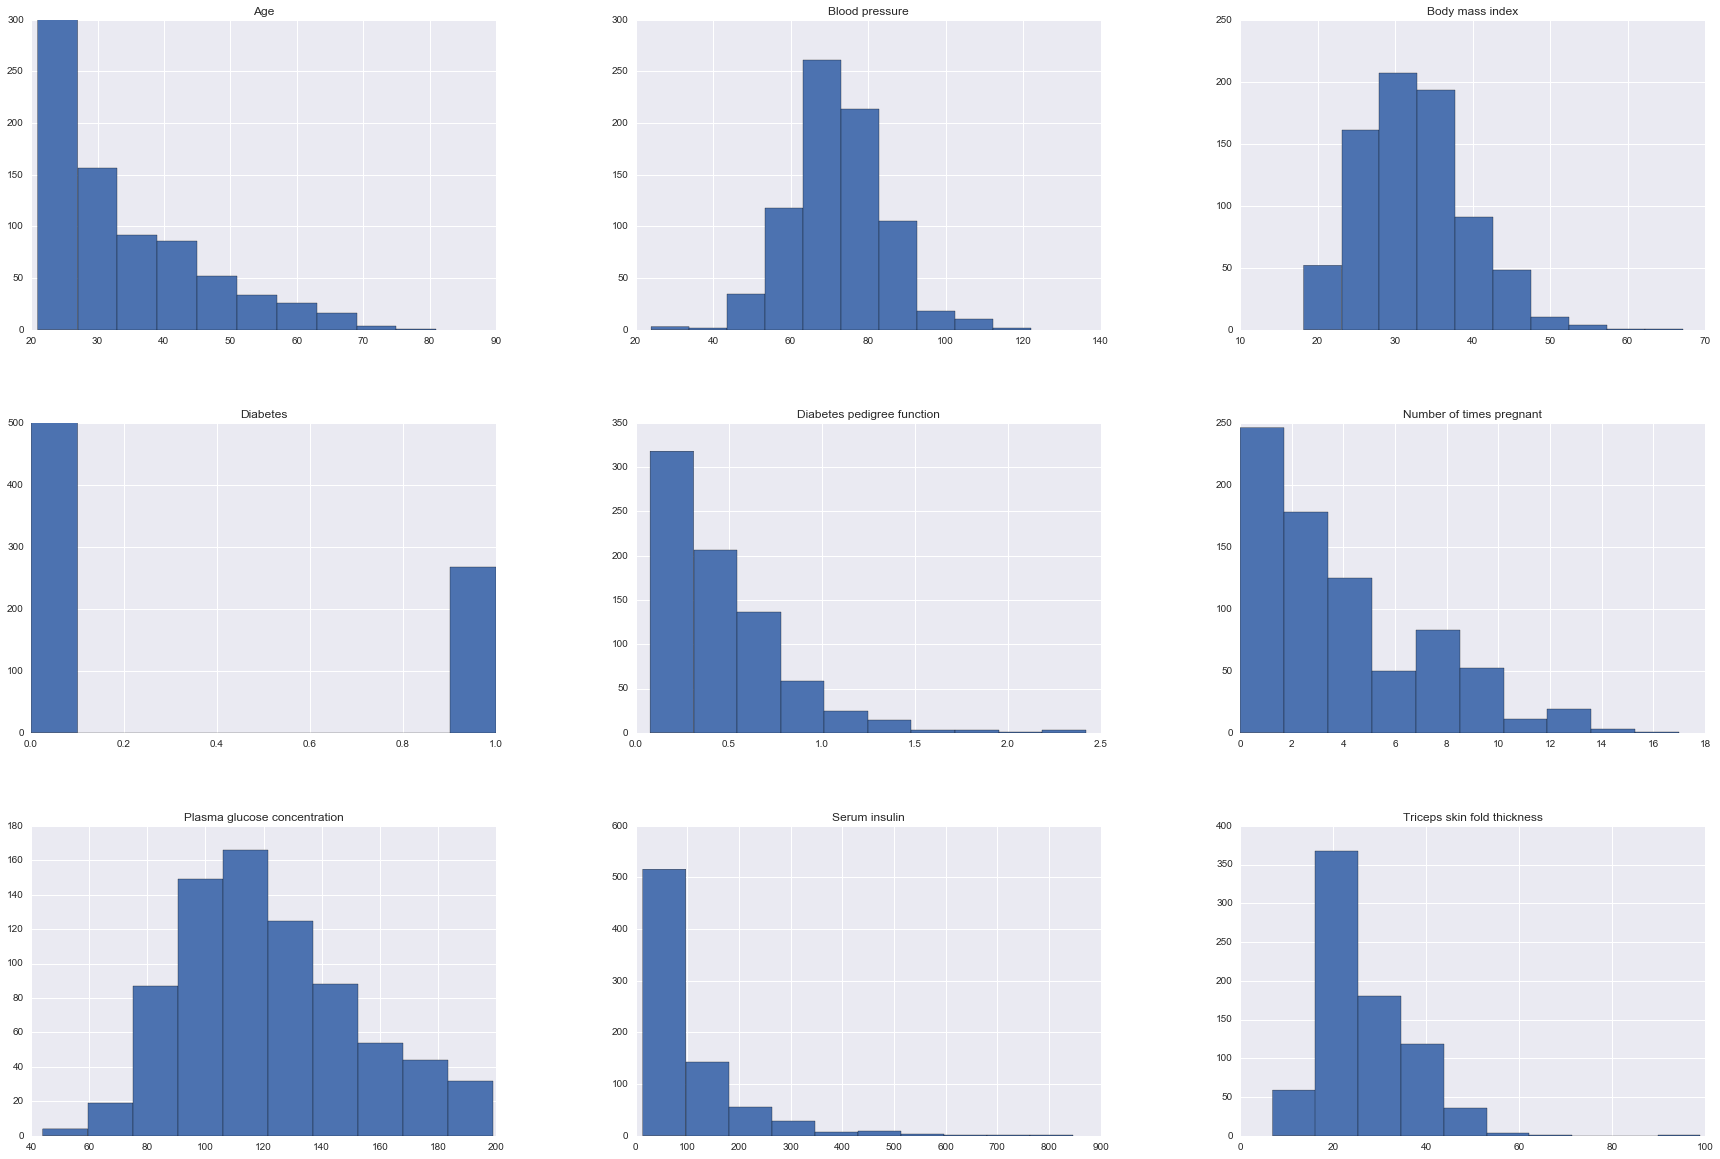

In [6]:
df.hist(figsize=(30, 20))

<b>Вывод:</b>
<ul>
<li>признаки Age, Diabetes pedigree function, Number of times pregnant, Serum insulin имеют либо экспоненциальное распределение, либо Хи-квадрат - распределение;</li>
<li>признаки Blood pressure, Body mass index, Plasma glucose concentration имеют нормальное распределение.</li>
</ul> 

Для параметра Triceps skin fold thickness определить распределение проблематично (возможно, хи-квадрат).

### Графики зависимостей целевого признака от остальных

C:\Users\Maxim\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


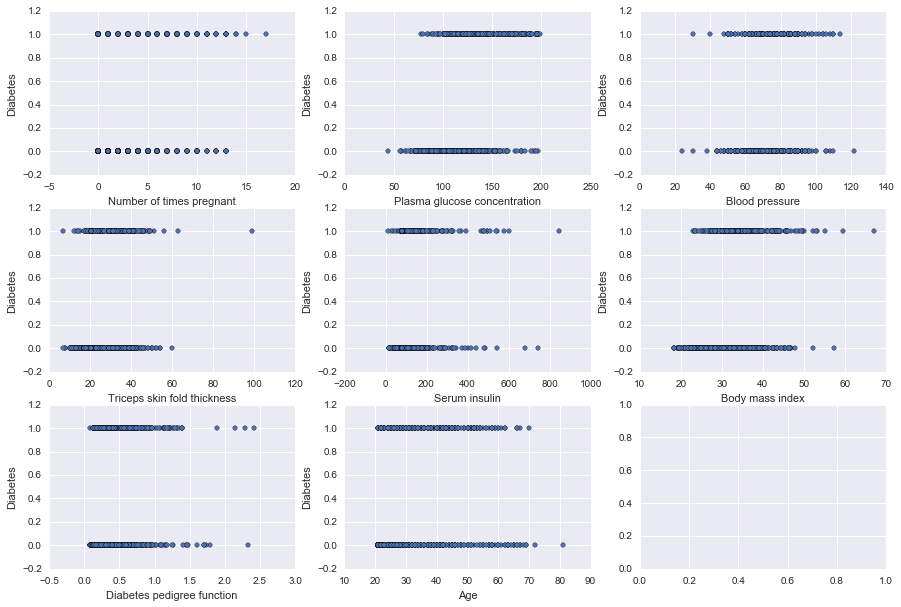

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for idx,feature in enumerate(df.columns[:-1]):
    df.plot(x=feature, y='Diabetes', subplots=True, kind="scatter", ax=axes[idx / 3, idx % 3])

<b>Вывод:</b>

Из большинства построенных графиков трудно сказать о каких-либо явно очевидных зависимостях целевого признака от остальных. Однако заметно, что с увеличением значений признаков Plasma glucose concentration, Blood pressure и Body mass index всё больше объектов находятся в классе 1. Следовательно, надо подробнее рассмотреть данные признаки.

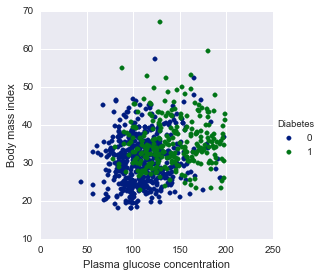

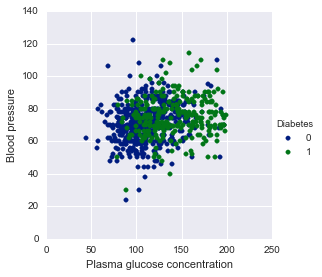

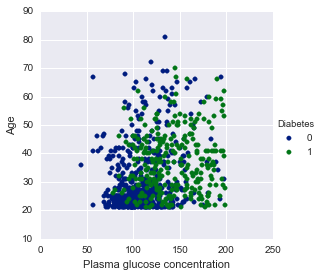

In [8]:
ses.FacetGrid(df, hue="Diabetes", size=4, palette='dark').map(plt.scatter,"Plasma glucose concentration", "Body mass index").add_legend()
ses.FacetGrid(df, hue="Diabetes", size=4, palette='dark').map(plt.scatter,"Plasma glucose concentration", "Blood pressure").add_legend()
ses.FacetGrid(df, hue="Diabetes", size=4, palette='dark').map(plt.scatter,"Plasma glucose concentration", "Age").add_legend()

<b>Вывод:</b>

Данные три графика отражают размещение объектов по классам в зависимости  от концентрации глюкозы и индекса массы тела, давления и возраста соответственно. Так, из них еще раз видно, что с увеличением концентрации глюкозы(а также значений остальных трёх признаков) уменьшается количество объектов класса 0 и увеличивается количество элементов класса 1. Это подтвердает предыдущый вывод.

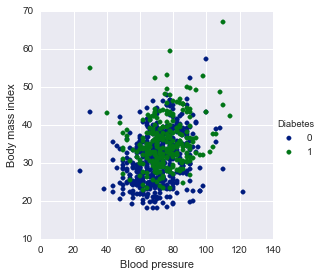

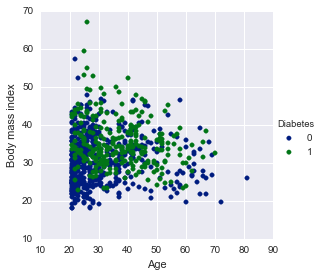

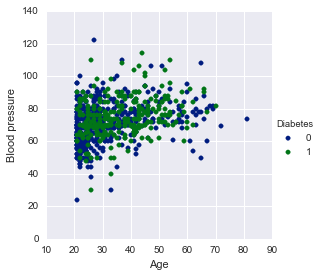

In [9]:
ses.FacetGrid(df, hue="Diabetes", size=4, palette='dark').map(plt.scatter,"Blood pressure", "Body mass index").add_legend()
ses.FacetGrid(df, hue="Diabetes", size=4, palette='dark').map(plt.scatter,"Age", "Body mass index").add_legend()
ses.FacetGrid(df, hue="Diabetes", size=4, palette='dark').map(plt.scatter,"Age", "Blood pressure").add_legend()

<b>Вывод:</b>

Данные графики отражают распределение объектов по классам в зависимости от индекса массы тела, давления и возраста. Видно, что изменения количества объектов класса 1 при изменении значений признаков незначительны, в отличие от предыдущего примера. 

Из графиков заметно, что ошибочно было заявлять, что признаки Blood pressure и Body mass index значительно влияют на целевой.

### Попарные графики зависимости всех признаков друг с другом

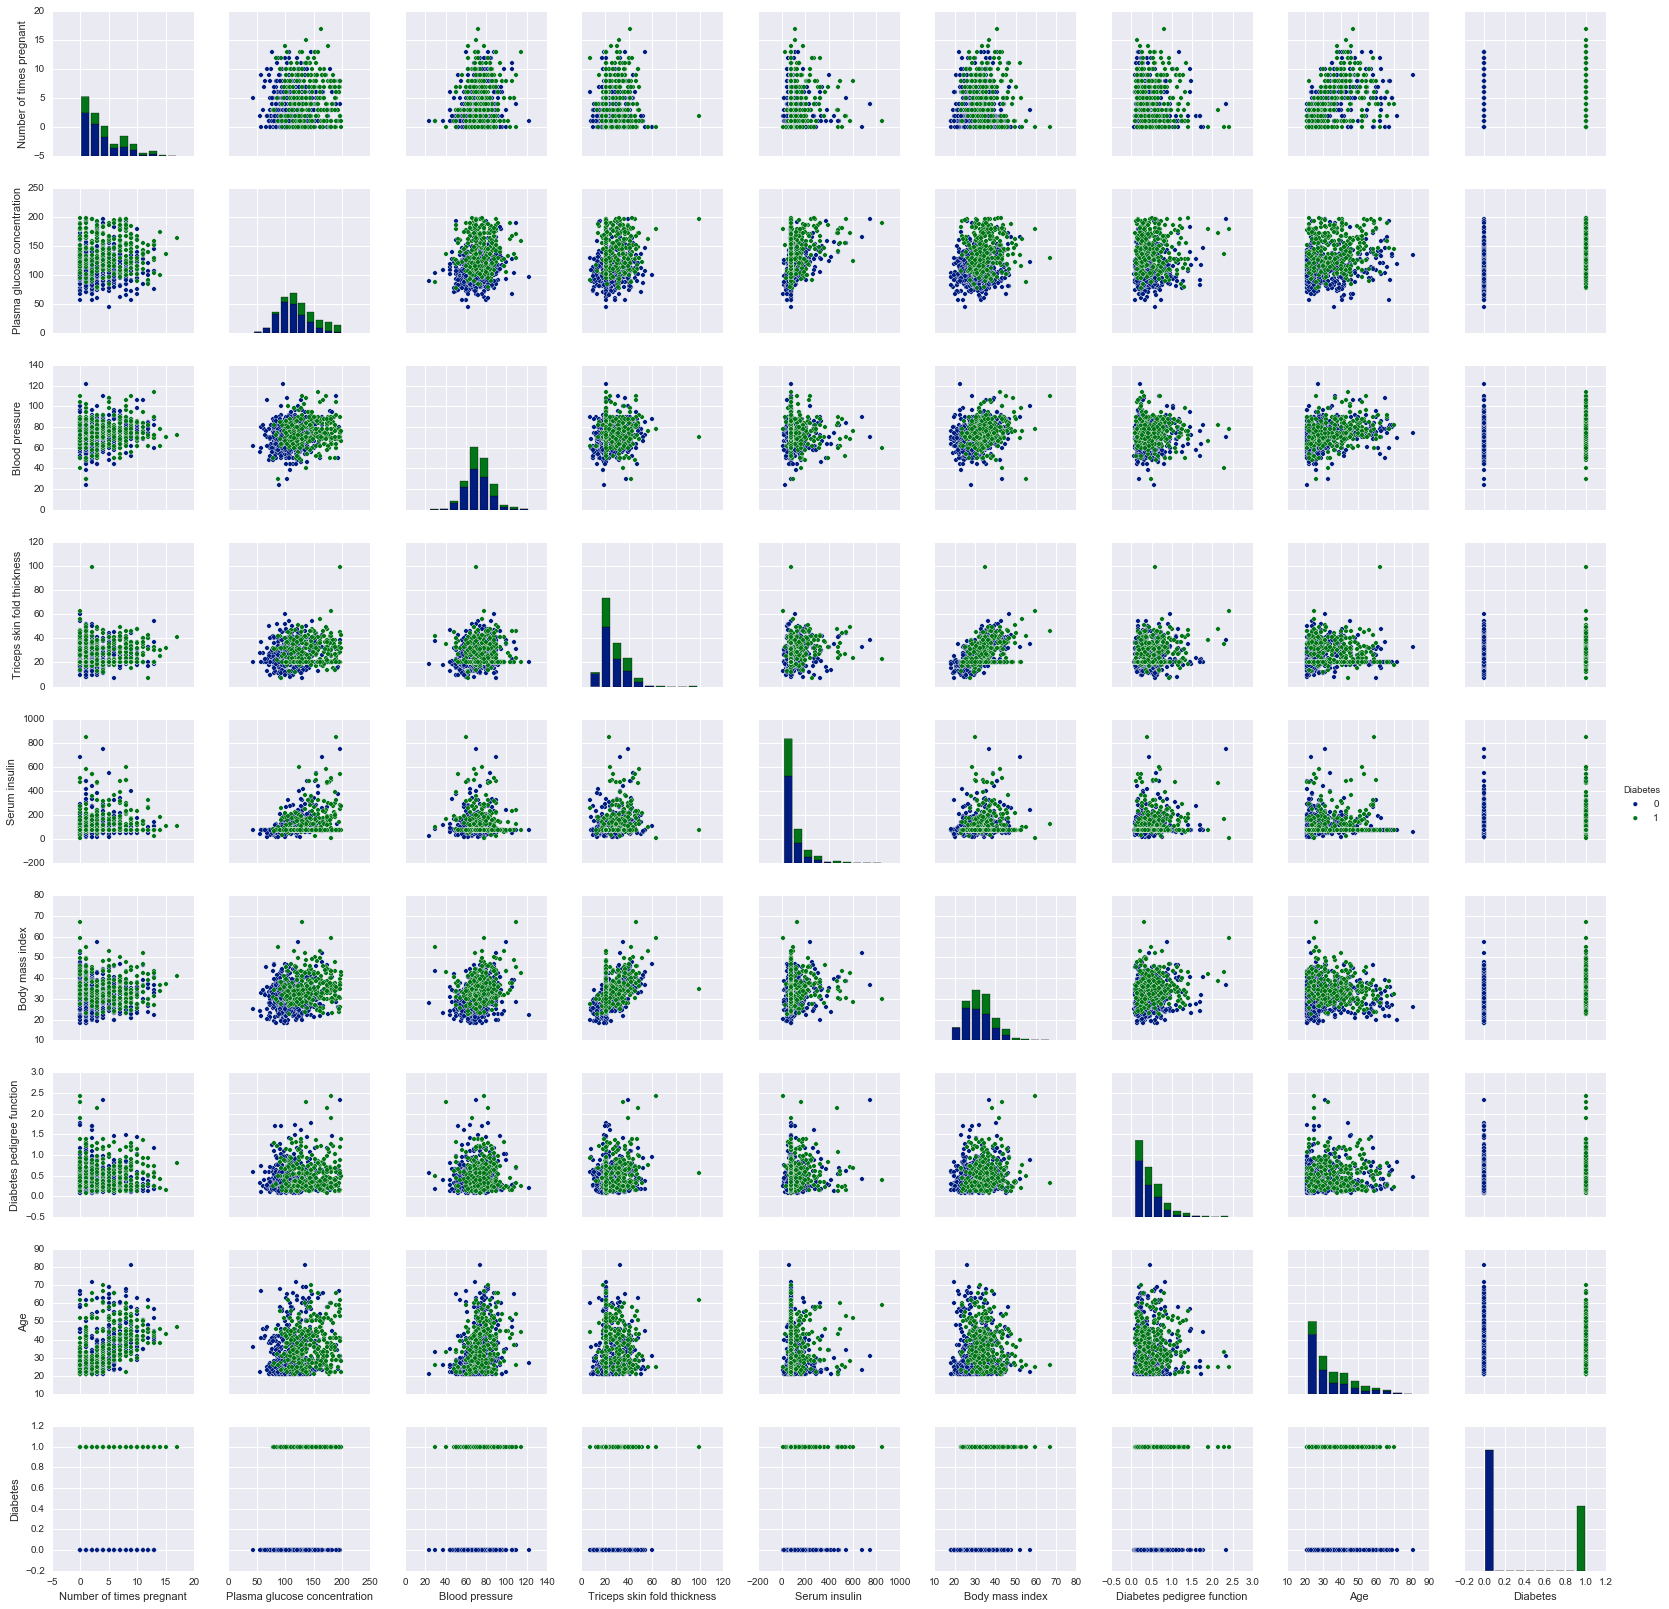

In [10]:
ses.pairplot(df, hue="Diabetes", palette='dark')

<b>Вывод:</b>

На основании данных графиков можно сделать вывод, что повышение концентрации глюкозы в совокупности с увеличением значений таких признаков, как давление, возраст, количество беременностей, а также толщина кожно-жировой складки над трицепсом  повышают вероятность того, что объект будет классифицирован к классу 1, причем наибольшее влияние на целевой признак оказывает именно значение концентрации глюкозы.

Данный блок содержит методы, которые потребуются при работы с данными.

In [5]:
# Подбирает лучшие параметры для логистической регрессии по обучающей выборке на кросс-валидации
def fit_log_reg(X_train, Y_train):
    param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
    lr_optimizer = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, cv = 3, scoring='roc_auc')
    lr_optimizer.fit(X_train, Y_train)
    
    print("Оптимальный параметр: ", lr_optimizer.best_params_)
    print("Качество на кросс-валидации: ",lr_optimizer.best_score_)
    return lr_optimizer

# Подбирает лучшие параметры для KNN по обучающей выборке на кросс-валидации
def fit_knn(X_train, Y_train):
    neighbors ={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                'weights': ['uniform', 'distance'],
                'p': [1,2]}

    knn_optimizer = GridSearchCV(KNeighborsClassifier(), param_grid=neighbors, cv=3, scoring='roc_auc')
    knn_optimizer.fit(X_train, Y_train)
    
    print("Оптимальные параметры: ", knn_optimizer.best_params_)
    print("Качество на кросс-валидации: ",knn_optimizer.best_score_) 
    return knn_optimizer

# Подбирает лучшие параметры для Decision tree по обучающей выборке на кросс-валидации
def fit_tree(X_train, Y_train):
    features = np.arange(1,9,1)
    depths = np.arange(3,15,1)
    grid = {'criterion':['gini', 'entropy'],
            'max_features':features,
            'min_samples_leaf': [5,7,9],
            'max_depth': depths}
    
    optimizer = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=grid, cv = 3, scoring='roc_auc')
    optimizer.fit(X_train, Y_train)
    
    print("Оптимальные параметры:", optimizer.best_params_)
    print("Качество на кросс-валидации: ", optimizer.best_score_)
    return optimizer

# Подбирает лучшие параметры для Random forest по обучающей выборке на кросс-валидации
def fit_forest(X_train, Y_train):
    features = np.arange(1,9,1)
    depths = np.arange(3,20,1)
    grid = {'criterion':['gini', 'entropy'],
            'max_features':features,
            'min_samples_leaf': [5,7,9],
            'max_depth': depths}
    
    optimizer = GridSearchCV(estimator = RandomForestClassifier(n_estimators=900, n_jobs=-1), param_grid=grid, cv = 3, scoring='roc_auc')
    optimizer.fit(X_train,Y_train)
    
    print("Оптимальные параметры:", optimizer.best_params_)
    print("Качество на кросс-валидации: ",optimizer.best_score_)
    return optimizer

# Балансирует выборку
def balance_samples(X_train, Y_train):
    majority_count = np.sum(Y_train==0) # Кол-во объектов большего класса
    minority_count = np.sum(Y_train==1) # Кол-во объектов меньшего класса
    
    indices_to_add = np.random.randint(1, minority_count, (majority_count - minority_count))
    
    # Объекты на добавление
    objects_to_add = X_train[Y_train.as_matrix() == 1, :][indices_to_add,:]
    answers_to_add = np.random.randint(1, 2, (majority_count - minority_count))
    
    # Формирование новых выборок
    new_X_train = np.vstack((X_train, objects_to_add))
    new_y_train = np.append(Y_train, answers_to_add)
    return new_X_train, new_y_train

## Работа с данными

In [6]:
X = df[df.columns[:-1]]
Y = df.Diabetes

scaler = StandardScaler() # стандартизация
X = scaler.fit_transform(X)

# Разбиваем на трейн и тест
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=20)

Посмотрим, как работают алгоритмы классификации с несбалансированными выборками и всеми признаками.

Для начала необходимо подобрать оптимальные параметры алгоритмов на кросс-валидации, затем делать обучение и предсказания.

### Обучение
#### Логистическая регрессия

In [7]:
lr_clf = fit_log_reg(X_train, Y_train)

Оптимальный параметр:  {'C': 1}
Качество на кросс-валидации:  0.839681258907


Качество классификации на обучении логистической регрессии довольно высоко, так как это линейный алгоритм, хорошо подходящий для задач с малым набором данных и достаточно большим числом признаков, поскольку у него мало параметров и низкая вероятность переобучения. 

#### KNN

In [8]:
knn_clf = fit_knn(X_train, Y_train)

Оптимальные параметры:  {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Качество на кросс-валидации:  0.847240735353


Метод ближайшего соседа выдаёт такой же ответ, какой является правильным для большинства объектов обучающей выборки, наиболее близких к новому объекту.

Результат алгортма на обучении не так плох. Однако следует помнить, что в тренировочной и в обучающей выборках преобладают объекты класса 0, что повышает эффективность классификации данного алгоритма, а также, что KNN чувствителен к шуму и склонен к переобучению из-за банального запоминания обучающей выборки.

#### Наивный Байесовский классификатор

In [9]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predicted = gnb.predict(X_train)
print("AUC ROC на тренировочной выборке: ", roc_auc_score(Y_train, predicted))

AUC ROC на тренировочной выборке:  0.731750196799


Алгоритм наивного байесовского классификатора делает предположения о независимости признаков и относит объект к тому классу, рассчитанная вероятность которого больше.

В данном случае наивный Байесовский классификатор показывает довольно оптимальный результат (хотя и далёкий от совершенства), так как большинство признаков выборки независимы (или почти независимы) между собой (это можно заметить по низкой корреляции). Однако следует учесть тот факт, что выборка несбалансирована, а значит вероятность того, что объект будет отнесен к более многочисленному классу, выше, чем к классу, где меньше объектов.

#### Decision tree

In [15]:
tree_clf = fit_tree(X_train, Y_train)

Оптимальные параметры: {'max_features': 4, 'min_samples_leaf': 5, 'criterion': 'entropy', 'max_depth': 7}
Качество на кросс-валидации:  0.81334363834


Алгоритм дерева принятия решений показывает довольно оптимальный результат на обучении. Интересно, что покажет Random forest.

#### Random Forest

In [14]:
forest_clf = fit_forest(X_train, Y_train)

Оптимальные параметры: {'criterion': 'entropy', 'max_features': 2, 'min_samples_leaf': 5, 'max_depth': 19}
Качество на кросс-валидации:  0.84883396632


Качество классификации леса решений лучше, чем качество одного единственного дерева, что очевидно, поскольку лес решений включает композицию большого количества деревьев решений.

<u>Теперь посмотрим, что показывают эти алгоритмы на <i>тестовой</i> выборке.</u>

### Предсказания

Логистическая регрессия

In [11]:
predicted = lr_clf.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.70459057072


KNN

In [12]:
predicted = knn_clf.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.72952853598


Наивный Байесовский классификатор

In [13]:
predicted = gnb.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.694168734491


Decision tree

In [16]:
predicted = tree_clf.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.678039702233


Radom forest

In [70]:
predicted = forest_clf.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.685359801489


#### Вывод: 
Рассмотренные алгоритмы показывают примерно одинаковый неплохой результат, однако он довольно сильно отличается от качества на обучении. Лучшим алгоритмом из всех на данном этапе является KNN (AUC ROC ~ 0.73), однако это скорее всего связано с тем, что в обучающей и тестовой выборках преобладают объекты одного класса.<br>Результат Decision tree и Random forest далёк от идеального. Вероятно, это происходит из-за недостаточно большого количества объектов для обучения и предсказаний, а также возможной погрешности в измерениях и объектах-выбросах, что не позволяет алгоритму качественно выявить закономерности в данных.

Попытаемся улучшить качество классификации, сбалансировав нашу выборку.

Но сначала посмотрим, какие признаки наиболее важны

<a list of 8 Text xticklabel objects>

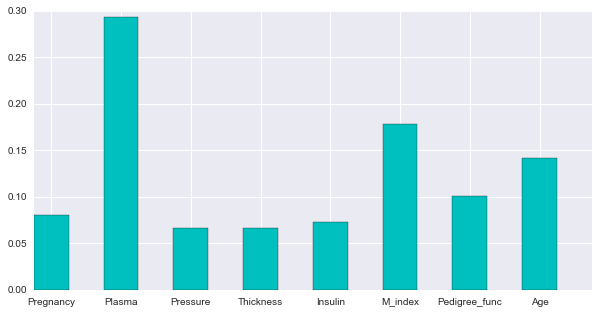

In [29]:
clf = RandomForestClassifier(n_estimators=800, max_depth=forest_clf.best_params_['max_depth'], criterion=forest_clf.best_params_['criterion'],max_features=forest_clf.best_params_['max_features'], min_samples_leaf=forest_clf.best_params_['min_samples_leaf'])
clf.fit(X_train, Y_train)

importance = clf.feature_importances_
idx = np.arange(importance.size)
width = 0.5
plt.figure(figsize=(10,5))
p1 = plt.bar(idx, clf.feature_importances_, width, color='c')
plt.xticks(idx+width/2, ("Pregnancy", "Plasma", 'Pressure', 'Thickness', 'Insulin', 'M_index', 'Pedigree_func', 'Age'))[1]

### Проведём балансировку классов в обучающей выборке

In [19]:
new_X_train, new_y_train = balance_samples(X_train, Y_train)

Теперь посмотрим, как изменилось качество классификации.

Также найдем новые оптимальные параметры и затем сделаем обучение и предсказания. 

### Обучение
#### Логистическая регрессия

In [20]:
new_lr_clf = fit_log_reg(new_X_train, new_y_train)

Оптимальный параметр:  {'C': 0.5}
Качество на кросс-валидации:  0.855071554639


#### KNN

In [21]:
new_knn_clf = fit_knn(new_X_train, new_y_train)

Оптимальные параметры:  {'n_neighbors': 29, 'p': 1, 'weights': 'distance'}
Качество на кросс-валидации:  0.954962574691


#### Наивный Байесовский классификатор

In [22]:
gnb.fit(new_X_train, new_y_train)
fin_predicted = gnb.predict(new_X_train)
print("AUC ROC на тренировочной выборке: ", roc_auc_score(new_y_train, fin_predicted))

AUC ROC на тренировочной выборке:  0.72972972973


#### Desicion tree

In [31]:
new_tree_clf = fit_tree(new_X_train, new_y_train)

Оптимальные параметры: {'max_features': 4, 'min_samples_leaf': 5, 'criterion': 'gini', 'max_depth': 6}
Качество на кросс-валидации:  0.865264192202


#### Random forest

In [74]:
new_forest_clf = fit_forest(new_X_train, new_y_train)

Оптимальные параметры: {'criterion': 'entropy', 'max_features': 4, 'min_samples_leaf': 5, 'max_depth': 11}
Качество на кросс-валидации:  0.906730176282


**Выводы:**

Заметно, что после балансировки классов, качество алгоритмов на обучении улучшилось.
Улучшилось качество работы наивного байесовского классификатора, а это убеждает нас в том, что большинство признаков выборки действительно независимы между собой.
Также заметно повысилось качество работы остальных алгоритмов. Это означает, что они лучше справляются с нахождением закономерностей в данных.

<u>Посмотрим качество на <i>тестовых</i> данных.</u>


### Предсказания
Логистическая регрессия

In [24]:
predicted = new_lr_clf.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.731389578164


KNN

In [25]:
predicted = new_knn_clf.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.709801488834


Наивный байесовский классификатор

In [26]:
predicted = gnb.predict(X_test)
print("AUC ROC на тренировочной выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тренировочной выборке:  0.707196029777


Decision tree

In [32]:
predicted = new_tree_clf.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.718610421836


Random forest

In [81]:
predicted = new_forest_clf.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.699875930521


#### Выводы:
Качество почти всех алгоритмов на тестовой выборке улучшилось по сравнению с предыдущим этапом проекта, однако оно всё также оставляет желать лучшего.<br>
Заметно улучилось качество работы логистической регрессии. Из всех алгоритмов - это один из немногих, который стабильно показывает всё более высокие результаты.<br>
Наивный байесовский классификатор показывает низкие результаты даже на обучении. Думаю, стоит попробовать его в композиции с другими алгоритмами.<br>
KNN показал результат хуже, чем на предыдущем этапе, хотя качество на обучении самое высокое. Вероятно, данный алгоритм переобучается.
Качество работы алгоритмов Decision tree и Random forest на новых данных улучшилось лишь немного.

Как можно заметить, такой высокозатратный алгоритм, как Random forest, показывает один из худжих результатов из всех остальных, хотя его качество на тренировке одно из лучших (вероятно данный алгоритм также переобучается), поэтому я считаю, что его дальнейшее использование малоразумно. 

#### На следующем этапе проекта я постараюсь повысить качество классификации за счёт добавления новых признаков, а также использования композиции алгоритмов классификации!

### Работа с признаками

Проведем работу с признаками, а именно - генерацию новых признаков. Из графика важности выше заметно, что наиболее важными признаками являются Plasma glucose concentration, Body mass index и Age. Добавим квадраты этих признаков в датафрейм.

Также из данных заметно, что большинство пациентов, диагностированных диабетиками, были в возрасте от 30 и старше, а их уровень сахара превышал значение 115. Поэтому добавим два признака, которые бы показывали превышают ли значения этих признаков пороги в 115 и 30.

In [33]:
df2 = df
df2.insert(8, 'Age_doubled', df.Age**2)
df2.insert(9, 'Plasma_doubled', df['Plasma glucose concentration']**2)
df2.insert(10, 'MI_doubled', df['Body mass index']**2)
df2.insert(11, 'Glucose>115', 0)
df2.insert(12, 'Age>30', 0)

df2.ix[df2['Plasma glucose concentration']>=115, "Glucose>115"] = 1
df2.ix[df2['Age']>=30, "Age>30"] = 1

df2.head()

,Number of times pregnant,Plasma glucose concentration,Blood pressure,Triceps skin fold thickness,Serum insulin,Body mass index,Diabetes pedigree function,Age,Age_doubled,Plasma_doubled,MI_doubled,Glucose>115,Age>30,Diabetes
0,6,148,72,35.000000,79.799479,33.6,0.627,50,2500,21904,1128.96,1,1,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,961,7225,707.56,0,1,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1024,33489,542.89,1,1,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,441,7921,789.61,0,0,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1089,18769,1857.61,1,1,1


In [84]:
df2[df2.columns[:-1]].describe().T

,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Plasma glucose concentration,768,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
Blood pressure,768,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
Triceps skin fold thickness,768,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Serum insulin,768,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
Body mass index,768,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
Diabetes pedigree function,768,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Age_doubled,768,1243.079427,951.415238,441.000,576.000000,841.000000,1681.00000,6561.00
Plasma_doubled,768,15731.557863,7978.037454,1936.000,9950.250000,13689.000000,19670.25000,39601.00


Посмотрим, как изменится качество работы алгоритмов после добавления новых признаков к сбалансированным выборкам.

Для начала проведем стандартизацию и разобьём выборку на трейн и тест.

In [34]:
X = df2[df2.columns[:-1]]
Y = df2.Diabetes

scaler = StandardScaler() # стандартизация
X = scaler.fit_transform(X)

# Разбиваем на трейн и тест
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=20)

# Балансируем выборку
new_X_train, new_y_train = balance_samples(X_train, Y_train)

### Обучение
#### Логистическая регрессия

In [35]:
lr_new_df = fit_log_reg(new_X_train, new_y_train)

Оптимальный параметр:  {'C': 10}
Качество на кросс-валидации:  0.855243087304


#### KNN

In [36]:
knn_new_df = fit_knn(new_X_train, new_y_train)

Оптимальные параметры:  {'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
Качество на кросс-валидации:  0.954889566986


#### Decision tree

In [37]:
tree_new_df = fit_tree(new_X_train, new_y_train)

Оптимальные параметры: {'max_features': 4, 'min_samples_leaf': 5, 'criterion': 'gini', 'max_depth': 13}
Качество на кросс-валидации:  0.867471612053


Попробуем <b>композицию логистической регрессии, KNN и наивного байесовского классификатора</b>

In [38]:
clf = VotingClassifier(estimators=[('lr',lr_new_df), ('gnb',gnb), ('knn', knn_new_df)], voting='hard')
clf.fit(new_X_train, new_y_train)
predicted = clf.predict(new_X_train)
print("Качество на тренировочной выборке: ", roc_auc_score(new_y_train, predicted))

Качество на тренировочной выборке:  0.810810810811


#### Выводы:
   Качество работы алгоритмов на обучении всё также остаётся высоким. 
   <br>Как и предполагалось, использование композиции логистической регресии, метода ближайших соседей и наивного байесовского классификатора показала неплохой результат. <br><br>Посмотрим, какие результаты будут на тестовой выборке.

### Предсказания
Логистическая регрессия

In [39]:
predicted = lr_new_df.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.744044665012


KNN

In [40]:
predicted = knn_new_df.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.765508684864


Decision tree

In [41]:
predicted = tree_new_df.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.665260545906


Композиция трёх алгоритмов

In [42]:
predicted = clf.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.768610421836


#### Выводы:
К сожалению, не удаётся улучшить качество алгоритма Decision tree. Этот алгоритм, вероятно, тоже переобучается. Также отбросим его дальейшее тестирование.
<br>
Теперь лучший результат показывает композиция трех алгоритмов: логистической регрессии, метода ближайших соседей и наивного байесовского классификатора.<br>
Два первых алгоритма по отдельности также увеличили показатель качества. Это значит, что добавление новых признаков позволило алгоритмам лучше находить зависимости в данных.

<br> Попробуем дальше улучшить качество классификации.

### Уберем все признаки, кроме самых информативных, их квадратов и новых добавленных

In [53]:
features = ["Plasma glucose concentration", "Body mass index", "Age", "Age_doubled", "Plasma_doubled", "MI_doubled", "Glucose>115", "Age>30"]

data = df2[features].copy()
target = df2.Diabetes.copy()

scaler = StandardScaler() # стандартизация
data = scaler.fit_transform(data)

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.25, random_state=20)

new_X_train, new_y_train = balance_samples(X_train, Y_train)

### Обучение
Логистическая регрессия

In [54]:
fin_lr_new_df = fit_log_reg(new_X_train, new_y_train)

Оптимальный параметр:  {'C': 5}
Качество на кросс-валидации:  0.837737718048


KNN

In [55]:
fin_knn_new_df = fit_knn(new_X_train, new_y_train)

Оптимальные параметры:  {'n_neighbors': 29, 'p': 1, 'weights': 'distance'}
Качество на кросс-валидации:  0.956244816807


Композиция

In [56]:
clf = VotingClassifier(estimators=[('lr',fin_lr_new_df), ('gnb',gnb), ('knn', fin_knn_new_df)], voting='hard')
clf.fit(new_X_train, new_y_train)
predicted = clf.predict(new_X_train)
print("Качество на тренировочной выборке: ", roc_auc_score(new_y_train, predicted))

Качество на тренировочной выборке:  0.798648648649


#### Выводы:
В общем и целом качество на тренировочных данных изменилось незначительно.<br>

<u><i>Посмотрим на качество на новых данных.</i></u>

### Предсказания
Логистическая регрессия

In [57]:
predicted = fin_lr_new_df.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.7682382134


KNN

In [58]:
predicted = fin_knn_new_df.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.745533498759


Композиция аогоритмов

In [59]:
predicted = clf.predict(X_test)
print("AUC ROC на тестовой выборке: ", roc_auc_score(Y_test, predicted))

AUC ROC на тестовой выборке:  0.764392059553


#### Выводы:
Оставив самые информаивные признаки, их квадраты и новые добавленные, обощающая способность алгоритмов выше улучшилась!<br>
Самый лучший результат показывает логистическая регрессия (AUC ROC ~ 0.76-0.77).<br>
Затем следует композиция трёх алгоритмов почти с таким же качеством классификации.<br>
Качество немного хуже показывает KNN. Видимо, не вышло до конца побороться с переобучением данного алгоритма, ведь на тренировочных данных его результат лучший.

### В конечном итоге:
Считаю, что проект выполнен успешно. Удалось достичь довольно высокого качества классификации (самый высокий результат ~0.77 показали два алгоритма: композиция логистической регрессии, KNN и наивного байесовского классификатора на сбалансированной выборке с 5-ю добавленными признаками к общему числу признаков, а также просто логистическая регрессия на сбалансированной выборке лишь с самыми информативными признаками и 5-ю новыми). Он оказался примерно таким же, что и у создателей датасета (из описания датасета: the sensitivity and specificity of their algorithm was 76% on 192 instances). Также удалось познакомиться со способами настройки алгоритмов на кросс-валидации, методами отбора признаков и создания новых признаков, узнать, что такое композиция алгоритмов, и научиться применять полученные знания на практике.